In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

pd.options.display.max_columns = 999
sns.set_style('white')

In [3]:
df = pd.read_csv('census_income_2019.csv', compression = 'zip')

In [4]:
df.head()

,PWGTP,WGTP,PINCP,WKHP,WAGP,AGEP,FER,DIS,COW,CPLT,ADJINC,CIT,POBP,PARTNER,SEX,RAC1P,SCHL,OCCP,NAICSP,SERIALNO,SPORDER
0,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1
1,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1
2,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1
3,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1
4,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1


In [5]:
df.shape

(3239553, 21)

# Data cleaning

In [6]:
df.head()

,PWGTP,WGTP,PINCP,WKHP,WAGP,AGEP,FER,DIS,COW,CPLT,ADJINC,CIT,POBP,PARTNER,SEX,RAC1P,SCHL,OCCP,NAICSP,SERIALNO,SPORDER
0,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1
1,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1
2,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1
3,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1
4,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1


In [7]:
df.shape

(3239553, 21)

In [8]:
org_vars = """PINCP
WAGP
INTP
ADJINC
PWGTP
OCCP
NAICSP
WKHP
AGEP
SEX
FER
CPLT
PARTNER
COW
RAC1P
POBP
CIT
SCHL
DIS
SERIALNO
SPORDER
WAOB""".split("\n")

In [9]:
uptd_vars = """INCOME
SALARY
INTEREST_DIV
ADJINC
FNLWGT
OCCUPATION
WORK_INDUSTRY
WKLY_HRS
AGE
SEX
MOM
COUPLE
PARTNER
WORK_CLASS
RACE
POB_DETAIL
CITIZENSHIP
EDUCATION
DIS
SERIALNO
PERSON_NO
POB_WORLD""".split("\n")

In [10]:
vars_dict = dict(zip(org_vars, uptd_vars))

In [11]:
vars_dict

{'PINCP': 'INCOME',
 'WAGP': 'SALARY',
 'INTP': 'INTEREST_DIV',
 'ADJINC': 'ADJINC',
 'PWGTP': 'FNLWGT',
 'OCCP': 'OCCUPATION',
 'NAICSP': 'WORK_INDUSTRY',
 'WKHP': 'WKLY_HRS',
 'AGEP': 'AGE',
 'SEX': 'SEX',
 'FER': 'MOM',
 'CPLT': 'COUPLE',
 'PARTNER': 'PARTNER',
 'COW': 'WORK_CLASS',
 'RAC1P': 'RACE',
 'POBP': 'POB_DETAIL',
 'CIT': 'CITIZENSHIP',
 'SCHL': 'EDUCATION',
 'DIS': 'DIS',
 'SERIALNO': 'SERIALNO',
 'SPORDER': 'PERSON_NO',
 'WAOB': 'POB_WORLD'}

In [12]:
df.dtypes

PWGTP         int64
WGTP          int64
PINCP         int64
WKHP          int64
WAGP          int64
AGEP          int64
FER           int64
DIS           int64
COW           int64
CPLT          int64
ADJINC      float64
CIT           int64
POBP          int64
PARTNER       int64
SEX           int64
RAC1P         int64
SCHL          int64
OCCP          int64
NAICSP       object
SERIALNO     object
SPORDER       int64
dtype: object

In [13]:
df = df.rename(columns=vars_dict)

In [14]:
df.head()

,FNLWGT,WGTP,INCOME,WKLY_HRS,SALARY,AGE,MOM,DIS,WORK_CLASS,COUPLE,ADJINC,CITIZENSHIP,POB_DETAIL,PARTNER,SEX,RACE,EDUCATION,OCCUPATION,WORK_INDUSTRY,SERIALNO,PERSON_NO
0,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1
1,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1
2,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1
3,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1
4,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1


In [15]:
df.duplicated().sum()

0

In [16]:
# narrow down data to adults over the 17 years old
df = df[df.AGE > 17]

In [17]:
df.shape

(2599171, 21)

In [18]:
# narrow down data to adults who worked in the past 12 months
df = df[df.WKLY_HRS > 0]

In [19]:
df.shape

(1659727, 21)

# Exploratory Data Analysis

In [20]:
df.describe()

,FNLWGT,WGTP,INCOME,WKLY_HRS,SALARY,AGE,MOM,DIS,WORK_CLASS,COUPLE,ADJINC,CITIZENSHIP,POB_DETAIL,PARTNER,SEX,RACE,EDUCATION,OCCUPATION,PERSON_NO
count,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06
mean,1.033513e+02,9.579058e+01,6.058823e+04,3.839128e+01,5.189937e+04,4.390527e+01,5.906477e-01,1.928990e+00,2.103359e+00,8.639788e-01,1.010145e+00,1.519284e+00,6.538772e+01,2.079902e-01,1.478681e+00,1.873518e+00,1.871658e+01,4.088068e+03,1.676787e+00
std,9.061065e+01,8.493126e+01,7.691692e+04,1.310493e+01,6.724644e+04,1.525340e+01,9.042176e-01,2.568414e-01,1.827131e+00,8.056928e-01,3.774759e-15,1.227446e+00,9.273321e+01,8.872759e-01,4.995454e-01,2.079837e+00,3.274921e+00,2.685733e+03,9.803672e-01
min,1.000000e+00,0.000000e+00,-1.020000e+04,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.010145e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00
25%,5.100000e+01,4.800000e+01,2.100000e+04,3.500000e+01,1.450000e+04,3.100000e+01,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.010145e+00,1.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01,2.040000e+03,1.000000e+00
50%,7.900000e+01,7.400000e+01,4.024000e+04,4.000000e+01,3.540000e+04,4.400000e+01,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.010145e+00,1.000000e+00,3.600000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,4.110000e+03,1.000000e+00
75%,1.230000e+02,1.160000e+02,7.200000e+04,4.200000e+01,6.500000e+04,5.600000e+01,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.010145e+00,1.000000e+00,4.800000e+01,0.000000e+00,2.000000e+00,1.000000e+00,2.100000e+01,5.740000e+03,2.000000e+00
max,2.408000e+03,2.377000e+03,1.629000e+06,9.900000e+01,7.170000e+05,9.600000e+01,2.000000e+00,2.000000e+00,8.000000e+00,4.000000e+00,1.010145e+00,5.000000e+00,5.540000e+02,4.000000e+00,2.000000e+00,9.000000e+00,2.400000e+01,9.830000e+03,2.000000e+01


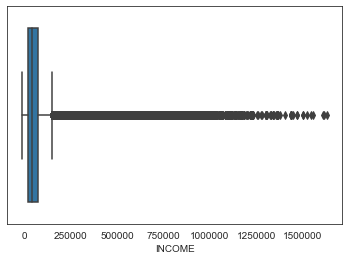

In [21]:
sns.boxplot(x=df.INCOME)


In [22]:
df.INCOME.describe()

count    1.659727e+06
mean     6.058823e+04
std      7.691692e+04
min     -1.020000e+04
25%      2.100000e+04
50%      4.024000e+04
75%      7.200000e+04
max      1.629000e+06
Name: INCOME, dtype: float64

In [23]:
df.INCOME

0           63000
2            2000
4            6000
11           3200
13            500
            ...  
3239548    150000
3239549     27000
3239550     75000
3239551     57000
3239552     55000
Name: INCOME, Length: 1659727, dtype: int64

In [24]:
df[df.INCOME > 100]['INCOME'].describe()

count    1.656282e+06
mean     6.071761e+04
std      7.694438e+04
min      1.040000e+02
25%      2.100000e+04
50%      4.050000e+04
75%      7.200000e+04
max      1.629000e+06
Name: INCOME, dtype: float64

In [25]:
df.SALARY.describe()

count    1.659727e+06
mean     5.189937e+04
std      6.724644e+04
min      0.000000e+00
25%      1.450000e+04
50%      3.540000e+04
75%      6.500000e+04
max      7.170000e+05
Name: SALARY, dtype: float64

In [26]:
df.EDUCATION.value_counts()

21    378817
16    342093
19    250254
22    166793
20    154487
18    120758
17     56487
23     42571
24     29033
15     26173
14     23779
1      15897
13     15039
12     12130
9       8507
11      8136
10      2418
8       1794
6       1670
7       1112
5        797
4        423
2        298
3        261
Name: EDUCATION, dtype: int64

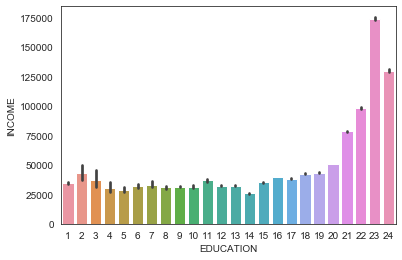

In [27]:
sns.barplot(data=df, x='EDUCATION', y='INCOME')

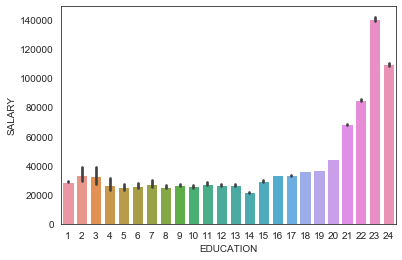

In [28]:
sns.barplot(data=df, x='EDUCATION', y='SALARY')

In [29]:
df['TARGET'] = np.where(df.INCOME > 65000, '>65k', '<=65k')

In [30]:
df.OCCUPATION.sort_values().unique()

array([  10,   20,   40,   51,   52,   60,  101,  102,  110,  120,  135,
        136,  137,  140,  150,  160,  205,  220,  230,  300,  310,  335,
        340,  350,  360,  410,  420,  425,  440,  500,  510,  520,  530,
        540,  565,  600,  630,  640,  650,  700,  705,  710,  725,  726,
        735,  750,  800,  810,  820,  830,  845,  850,  860,  900,  910,
        930,  940,  960, 1005, 1006, 1007, 1010, 1021, 1022, 1031, 1032,
       1050, 1065, 1105, 1106, 1108, 1200, 1220, 1240, 1305, 1306, 1310,
       1320, 1340, 1350, 1360, 1400, 1410, 1420, 1430, 1440, 1450, 1460,
       1520, 1530, 1541, 1545, 1551, 1555, 1560, 1600, 1610, 1640, 1650,
       1700, 1710, 1720, 1745, 1750, 1760, 1800, 1821, 1822, 1825, 1840,
       1860, 1900, 1910, 1920, 1935, 1970, 1980, 2001, 2002, 2003, 2004,
       2005, 2006, 2011, 2012, 2013, 2014, 2015, 2016, 2025, 2040, 2050,
       2060, 2100, 2105, 2145, 2170, 2180, 2205, 2300, 2310, 2320, 2330,
       2350, 2360, 2400, 2435, 2440, 2545, 2555, 26

In [31]:
np.select

<function numpy.select>

In [32]:
df.TARGET.value_counts()

<=65k    1183289
>65k      476438
Name: TARGET, dtype: int64

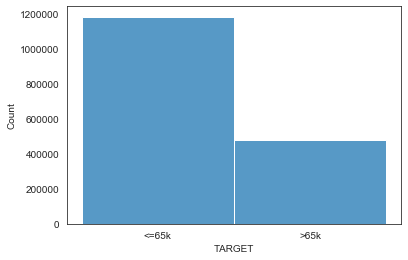

In [33]:
sns.histplot(data = df, x="TARGET")
plt.show()

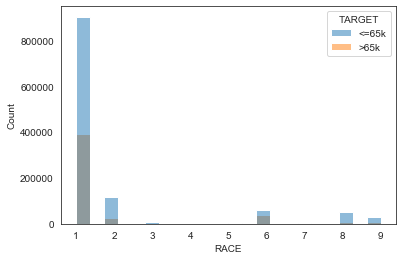

In [34]:
sns.histplot(data = df, x="RACE", hue = "TARGET")
plt.show()

In [35]:
df.RACE.value_counts(normalize=True)

1    0.781234
2    0.086688
6    0.060529
8    0.036479
9    0.024829
3    0.006817
7    0.001695
5    0.001208
4    0.000521
Name: RACE, dtype: float64

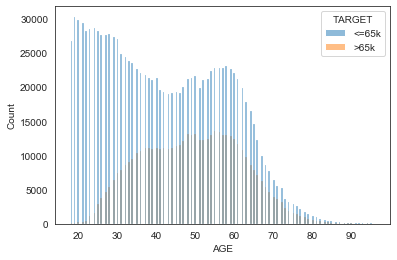

In [36]:
sns.histplot(data = df, x="AGE", hue = "TARGET")
plt.show()

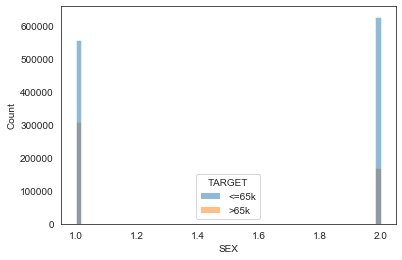

In [37]:
sns.histplot(data = df, x="SEX", hue = "TARGET")
plt.show()

In [38]:
df.SEX.value_counts()

1    865247
2    794480
Name: SEX, dtype: int64

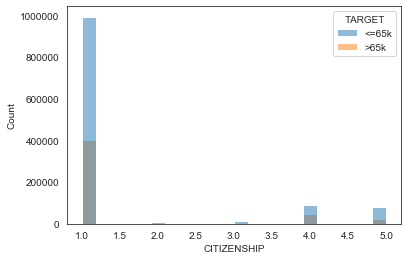

In [39]:
sns.histplot(data = df, x="CITIZENSHIP", hue = "TARGET")
plt.show()

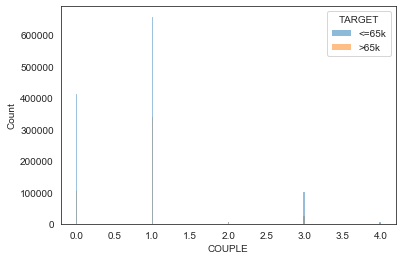

In [40]:
sns.histplot(data = df, x="COUPLE", hue = "TARGET")
plt.show()

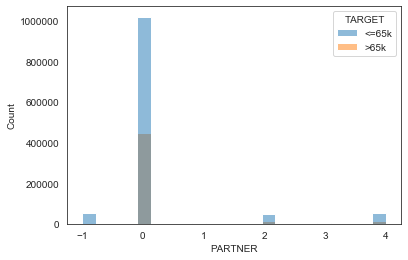

In [41]:
sns.histplot(data = df, x="PARTNER", hue = "TARGET")
plt.show()

In [42]:
df.PARTNER.value_counts()

 0    1468733
 4      64335
 2      63778
-1      55170
 3       3885
 1       3826
Name: PARTNER, dtype: int64

In [43]:
df.SEX.unique()

array([1, 2])

In [44]:
# sns.histplot(data = df, x="POB_WORLD", hue = "TARGET_60")

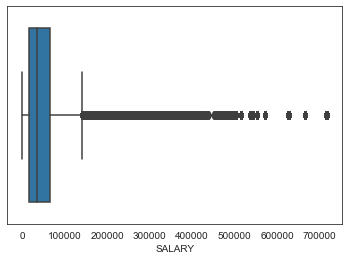

In [45]:
sns.boxplot(x=df.SALARY)


In [46]:
df.INCOME.median()

40240.0

In [47]:
df.SALARY.median()

35400.0

In [48]:
# Removed work_industry because it was causing an error when running model because because letters in values. Also, occupation might be a more relavent variable

X = df.drop(['TARGET','INCOME', 'SALARY', 'SERIALNO', 'PERSON_NO', 'WORK_INDUSTRY', 'ADJINC'], axis=1)
y = df.TARGET

# Models creation

##### Baseline model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [48]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.7611801451804151

In [50]:
importance = tree.feature_importances_
feat_imp_dict = dict(zip(X.columns, importance))

In [51]:
feat_imp_dict

{'FNLWGT': 0.10829480319530405,
 'WGTP': 0.10799365022161289,
 'WKLY_HRS': 0.09649302180071186,
 'AGE': 0.14519224200386618,
 'MOM': 0.004859850066872642,
 'DIS': 0.0069148010646517405,
 'WORK_CLASS': 0.029010577002000056,
 'COUPLE': 0.018172898288165866,
 'CITIZENSHIP': 0.007365308298547908,
 'POB_DETAIL': 0.10236710163697915,
 'PARTNER': 0.006382185074252717,
 'SEX': 0.01924846644767221,
 'RACE': 0.01666202782869113,
 'EDUCATION': 0.0776598765504098,
 'OCCUPATION': 0.25338319052026176}

In [52]:
X_scaled = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis = 0)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42, stratify = y)

In [54]:
X_train.shape

(1244795, 15)

##### Logistic regression and gridsearch

In [55]:
pipe = Pipeline([('logrg', LogisticRegression())])

param_grid = {
    'logrg__penalty' : ['l1', 'l2'],
    'logrg__C' : [.01, .1, 1, 10, 100 ],
    'logrg__solver' : ['liblinear', 'sag', 'saga'],
    'logrg__max_iter' : [100, 200, 300]
}

In [56]:
clf = GridSearchCV(pipe, param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 27.3min finished


In [58]:
best_clf.best_params_

{'logrg__C': 1,
 'logrg__max_iter': 200,
 'logrg__penalty': 'l2',
 'logrg__solver': 'saga'}

In [61]:
best_clf.best_score_

0.7931779933200894

##### Decision Tree and gridsearch

In [93]:
dt = DecisionTreeClassifier()
dt_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [8, 9, 10, 11],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8]
}

In [94]:
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=3, verbose=True, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 12.5min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 5, 10]},
             verbose=True)

In [98]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 8,
 'min_samples_split': 5}

In [99]:
dt_grid_search.best_score_

0.816522398228063

##### Random forest and gridsearch

In [102]:
rf_clf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [103]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, verbose=True, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 95.0min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 144.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [79]:
rf_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 100}

In [80]:
rf_grid_search.best_score_

0.8263320462747821

In [110]:
rf_clf = RandomForestClassifier(criterion = 'gini', min_samples_split = 5, min_samples_leaf = 6)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=6, min_samples_split=5)

In [114]:
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8266824443523276

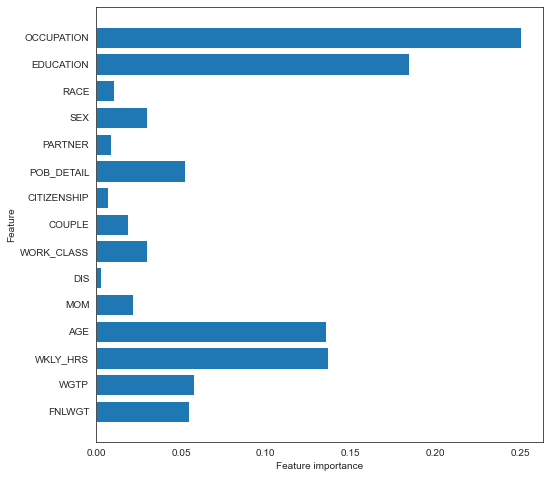

In [117]:
def plot_feature_imporances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (8,8))
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_imporances(rf_clf)

# Model evaluations

In [100]:
logrg_score = best_clf.score(X_test, y_test)
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)


print("Logistic regression grid search ", logrg_score)
print("Decision tree grid search ", dt_score)
print("Random forest grid search", rf_score)

Logistic regression grid search  0.7936240155013352
Decision tree grid search  0.8173001841265557
Random forest grid search 0.8268029460248908
